## **43. What is LogisticRegression?**

**Logistic Regression** is a type of regression analysis used for predicting the probability of a categorical dependent variable. It is used when the target variable is binary (i.e., it has two classes, like 0 and 1, or "True" and "False"). The output is a probability that the given input point belongs to a particular class.

In **Logistic Regression**, the model uses a **sigmoid function** to model the probability of the target being one class or the other. The sigmoid function outputs values between 0 and 1, representing probabilities.

### **Key Concepts of Logistic Regression:**
- The output of the logistic regression model is a probability value.
- The sigmoid function is used to map the predicted output to a value between 0 and 1.
- If the predicted probability is greater than or equal to 0.5, the output is classified as class 1; otherwise, it's classified as class 0.

The formula for the sigmoid function is:
\[
\sigma(z) = \frac{1}{1 + e^{-z}}
\]
Where:
- \( z = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + ... + \theta_n x_n \) is the linear combination of input features.

### **Python Example: Logistic Regression**

Here’s a simple example of **Logistic Regression** using Python’s `scikit-learn` library to classify whether an email is spam or not based on two features: email length and the number of capital letters in the email.


Accuracy: 0.8733333333333333


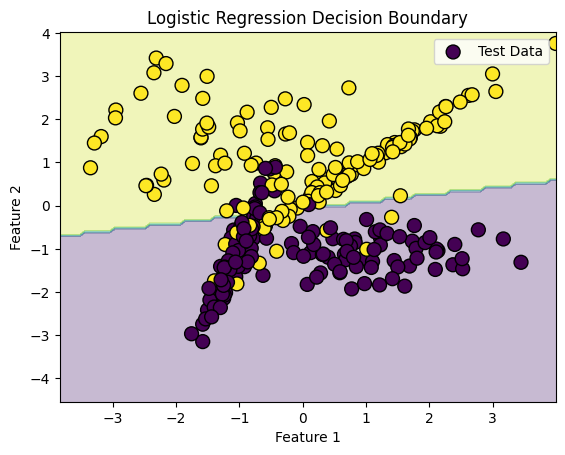

In [6]:

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Generate a synthetic dataset for classification (spam vs. not spam)
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_classes=2, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Logistic Regression model
logreg = LogisticRegression()

# Train the model on the training data
logreg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logreg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Plot the decision boundary
xx, yy = np.meshgrid(np.linspace(X[:, 0].min(), X[:, 0].max(), 100),
                     np.linspace(X[:, 1].min(), X[:, 1].max(), 100))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors='k', marker='o', s=100, label="Test Data")
plt.title('Logistic Regression Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45


Feature Importances:
              Feature  Importance
3   petal width (cm)    0.433982
2  petal length (cm)    0.417308
0  sepal length (cm)    0.104105
1   sepal width (cm)    0.044605


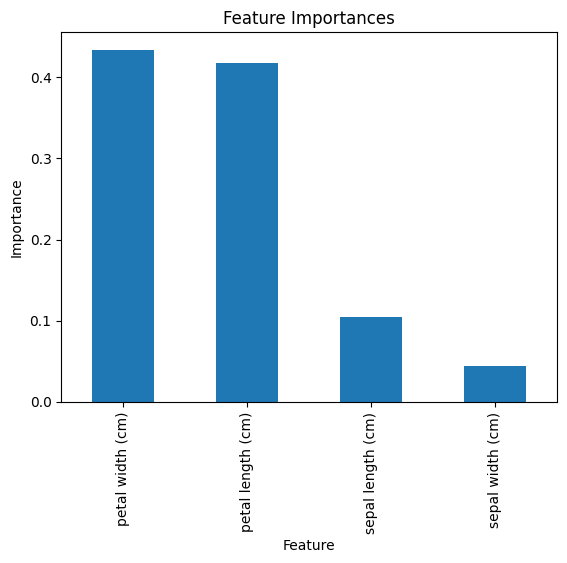

In [5]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features (sepal length, sepal width, petal length, petal width)
y = iris.target  # Target (species)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  # 100 trees
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Feature Importance
feature_importances = rf_model.feature_importances_
features = iris.feature_names

# Display Feature Importances
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print("\nFeature Importances:\n", importance_df)

# Visualizing Feature Importances
importance_df.plot(kind='bar', x='Feature', y='Importance', legend=False, title="Feature Importances")
plt.ylabel("Importance")
plt.show()


Learned weights: [-0.2  0.2  0.1]
Predictions: [0 0 0 1]


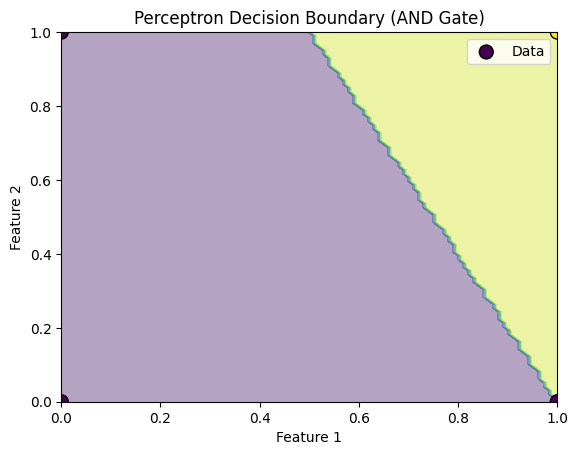

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Perceptron class
class Perceptron:
    def __init__(self, input_size, learning_rate=0.1, n_iter=1000):
        self.weights = np.zeros(input_size + 1)  # Initialize weights (including bias)
        self.learning_rate = learning_rate
        self.n_iter = n_iter

    def activation(self, x):
        """Step activation function: Returns 1 if x >= 0, else returns 0"""
        return 1 if x >= 0 else 0

    def predict(self, X):
        """Predict the class for each input"""
        return np.array([self.activation(np.dot(x, self.weights[1:]) + self.weights[0]) for x in X])

    def fit(self, X, y):
        """Train the perceptron using the training data"""
        for _ in range(self.n_iter):
            for xi, target in zip(X, y):
                prediction = self.activation(np.dot(xi, self.weights[1:]) + self.weights[0])
                # Update rule
                self.weights[1:] += self.learning_rate * (target - prediction) * xi
                self.weights[0] += self.learning_rate * (target - prediction)  # Bias update

# Example: AND gate classification
# Features: X, Labels: y
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 0, 0, 1])  # AND gate output

# Create Perceptron model
model = Perceptron(input_size=2, learning_rate=0.1, n_iter=10)

# Train the perceptron
model.fit(X, y)

# Make predictions on the training data
predictions = model.predict(X)

# Print the learned weights and predictions
print("Learned weights:", model.weights)
print("Predictions:", predictions)

# Visualize the decision boundary
x_min, x_max = 0, 1
y_min, y_max = 0, 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=100, label="Data")
plt.title('Perceptron Decision Boundary (AND Gate)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()
